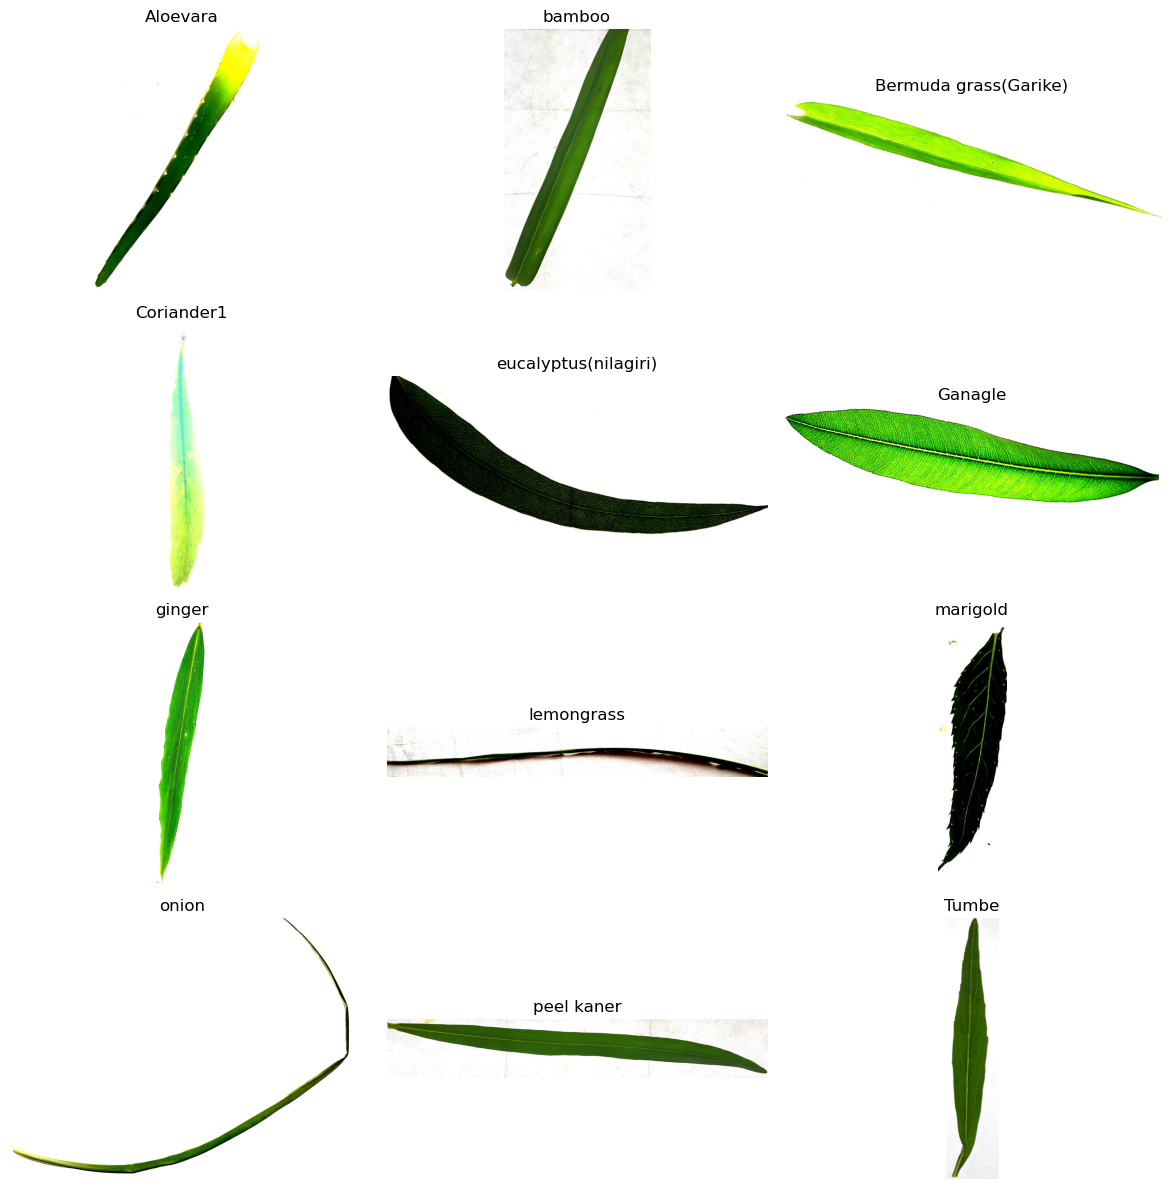

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Dataset path
data_path = r"C:\Users\91974\Downloads\Working projects\IPlantSpec\G7"

# Visualize samples
species = os.listdir(data_path)
plt.figure(figsize=(12, 12))
for i, specie in enumerate(species[:12]):  # Show up to 12 species
    img_path = os.path.join(data_path, specie, os.listdir(os.path.join(data_path, specie))[0])
    img = Image.open(img_path)
    plt.subplot(4, 3, i+1)  # Adjust rows and columns as needed
    plt.imshow(img)
    plt.title(specie)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [22]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from scipy.spatial.distance import cdist

# Path to dataset
base_path = r"C:\Users\91974\Downloads\Working projects\IPlantSpec\G7"

# Feature extraction function (color histogram)
def extract_features(image):
    # Resize image
    image = cv2.resize(image, (128, 128))
    # Compute color histogram
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Load data
data = []
labels = []

for species in os.listdir(base_path):
    species_path = os.path.join(base_path, species)
    if os.path.isdir(species_path):
        for img_file in os.listdir(species_path):
            img_path = os.path.join(species_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                features = extract_features(img)
                data.append(features)
                labels.append(species)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Scale features
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train a classifier (SVM)
classifier = SVC(kernel='linear', probability=True)
classifier.fit(X_train, y_train)

# Classification report
predictions = classifier.predict(X_test)
print("Classification Report:\n", classification_report(y_test, predictions))

# Compute inter-class similarity
class_means = []
for class_id in np.unique(labels):
    class_features = data[labels == class_id]
    class_mean = np.mean(class_features, axis=0)
    class_means.append(class_mean)

class_means = np.array(class_means)
similarity_matrix = 1 - cdist(class_means, class_means, metric='cosine')

print("\nInter-Class Similarity Matrix:")
print(similarity_matrix)

# Save results
np.savetxt("inter_class_similarity.csv", similarity_matrix, delimiter=",", fmt="%.4f")


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.71      0.90      0.79        30
           2       0.93      0.81      0.86        31
           3       0.82      1.00      0.90        27
           4       0.74      0.83      0.78        24
           5       0.85      0.74      0.79        31
           6       0.88      0.88      0.88        32
           7       0.62      0.83      0.71        18
           8       0.89      0.96      0.92        25
           9       0.80      0.55      0.65        29
          10       0.93      0.74      0.82        34
          11       0.83      0.83      0.83        18

    accuracy                           0.82       327
   macro avg       0.82      0.82      0.81       327
weighted avg       0.83      0.82      0.81       327


Inter-Class Similarity Matrix:
[[ 1.         -0.00351234 -0.22603636 -0.23290093 -0.06281965  0.00470097
   

In [20]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
